<a href="https://colab.research.google.com/github/Nymisha-ruby/GRIP-Internship/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 3 - Exploratory Data Analysis - Retail


In [1]:
#Importing the basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data
data = pd.read_csv('/content/drive/MyDrive/SampleSuperstore.csv')

In [ ]:
#Displaying 10 random rows from the dataset
data.sample(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2844,Standard Class,Corporate,United States,Woodstock,Illinois,60098,Central,Furniture,Chairs,845.488,8,0.3,-12.0784
3530,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Office Supplies,Art,21.400,5,0.0,6.2060
5662,Standard Class,Home Office,United States,Aurora,Colorado,80013,West,Office Supplies,Storage,511.056,9,0.2,-95.8230
5668,Standard Class,Consumer,United States,Seattle,Washington,98103,West,Office Supplies,Binders,53.984,14,0.2,17.5448
7294,Standard Class,Consumer,United States,Bellevue,Washington,98006,West,Furniture,Furnishings,20.240,1,0.0,7.8936
2555,Standard Class,Consumer,United States,New York City,New York,10035,East,Technology,Accessories,50.000,2,0.0,12.0000
6420,Standard Class,Corporate,United States,Tulsa,Oklahoma,74133,Central,Office Supplies,Art,12.390,3,0.0,3.4692
6335,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Binders,18.280,5,0.2,6.3980
9888,Standard Class,Consumer,United States,Utica,New York,13501,East,Technology,Accessories,79.990,1,0.0,28.7964
8916,Standard Class,Corporate,United States,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168


In [ ]:
print('No. of rows and columns')
data.shape

No. of rows and columns


(9994, 13)

In [ ]:
#Concise summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
#Number of distinct observations
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
#relplot (try) catplt

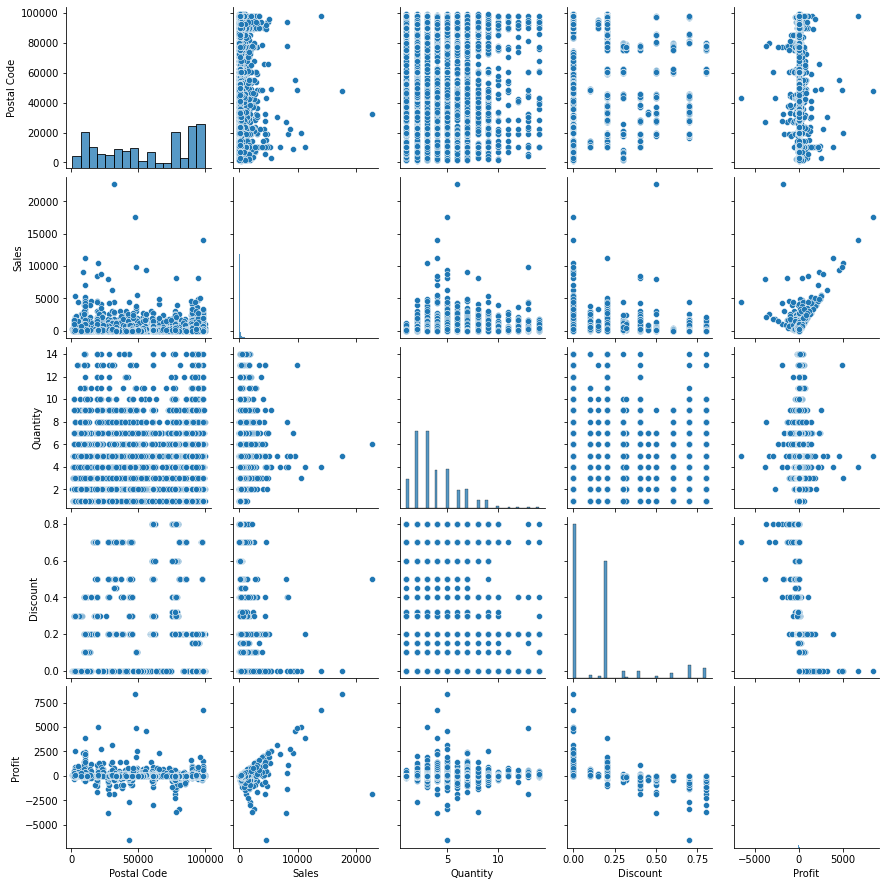

In [11]:
#Plotting multiple pairwise bivariate distributions
sns.pairplot(data)

In [ ]:
#Counts of unique values
data['Ship Mode'].value_counts() 

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


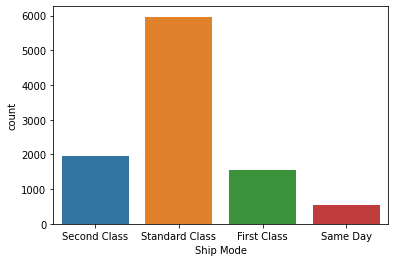

In [ ]:
#Counts of observations
sns.countplot(data['Ship Mode'])

In [ ]:
#Splitting the Object, Applying a function, Combining the results.
sm_p = data.groupby(['Ship Mode'],as_index=False)['Profit'].sum()
sm_p

,Ship Mode,Profit
0,First Class,48969.8399
1,Same Day,15891.7589
2,Second Class,57446.6354
3,Standard Class,164088.7875


In [ ]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


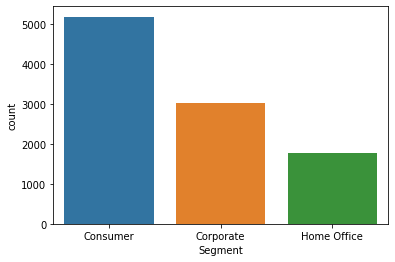

In [ ]:
sns.countplot(data['Segment'])

In [ ]:
s_p =data.groupby(['Segment'],as_index=False)['Profit'].sum()
s_p

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


In [ ]:
data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


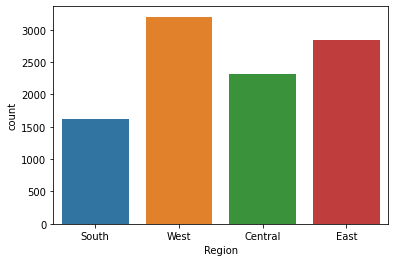

In [ ]:
sns.countplot(data['Region'])

In [ ]:
r_p = data.groupby(['Region'],as_index=False)['Profit'].sum()
r_p

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


In [ ]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


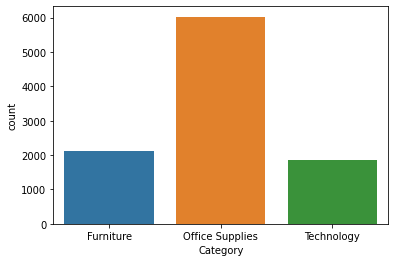

In [ ]:
sns.countplot(data['Category'])

In [ ]:
c_p = data.groupby(['Category'],as_index=False)['Profit'].sum()
c_p

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


# Checking the correlation

In [ ]:
#To find the correlation between columns
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


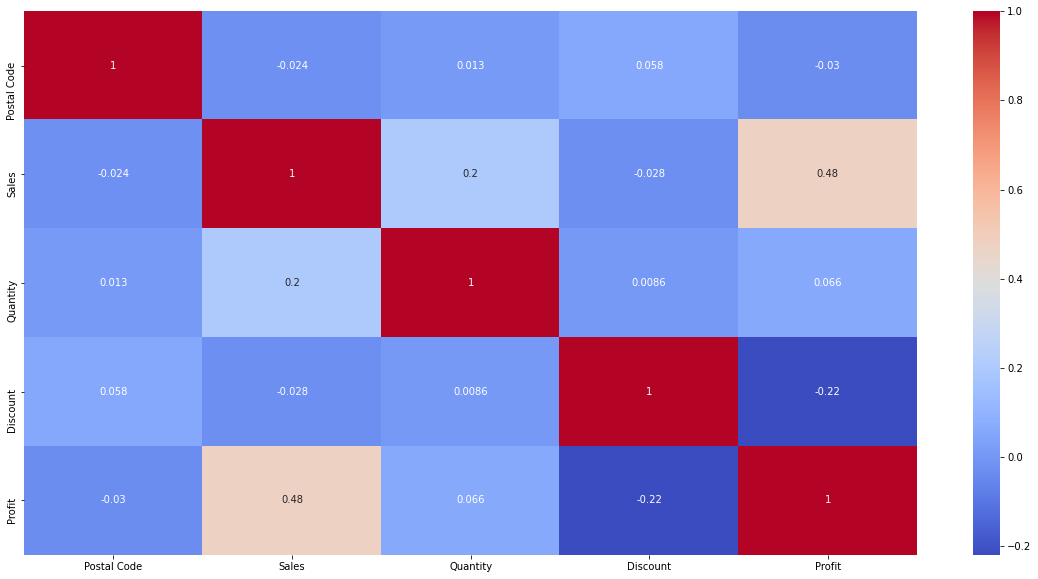

In [ ]:
#Visual correlation
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Sales v/s Profit')

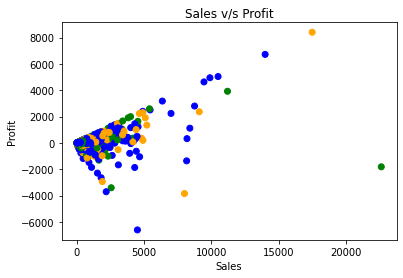

In [18]:
fig, ax = plt.subplots()
colors={'Consumer':'Blue','Corporate':'Orange','Home Office':'Green'}
ax.scatter(x=data['Sales'], y=data['Profit'], c=data['Segment'].apply(lambda x: colors[x]))
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales v/s Profit')

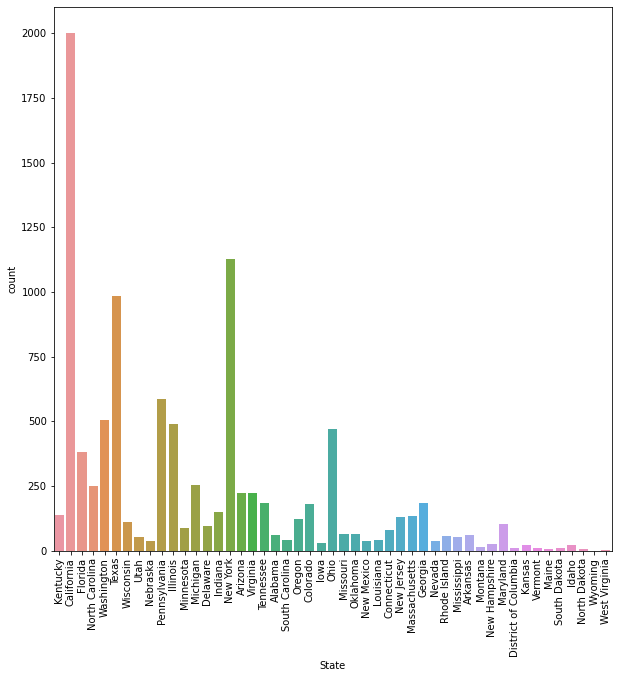

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.show()

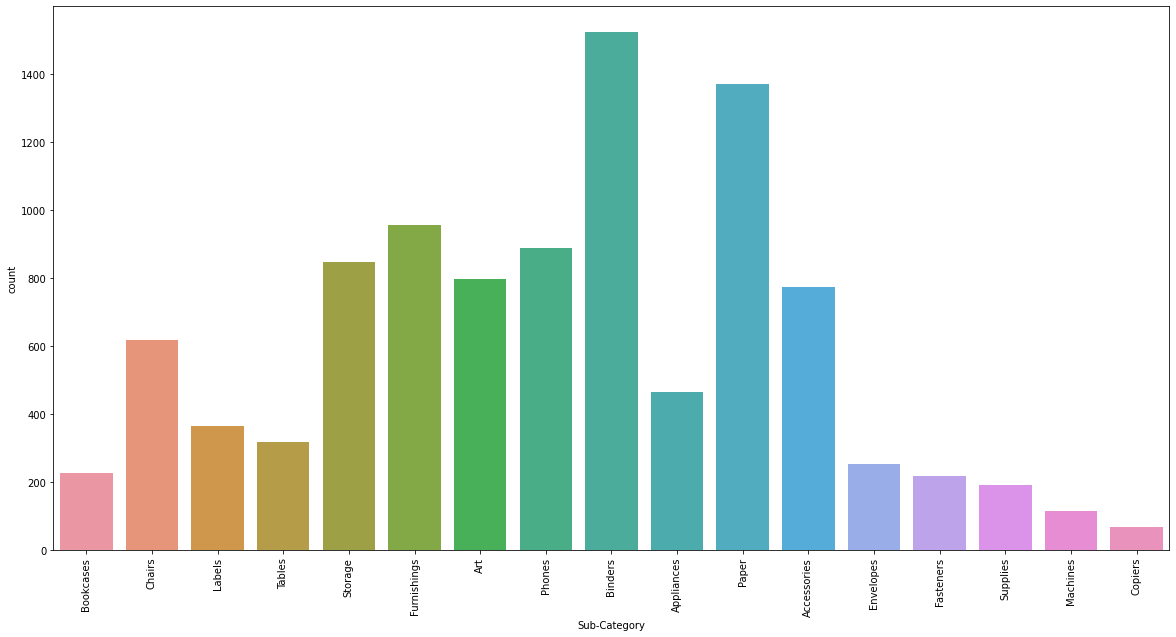

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

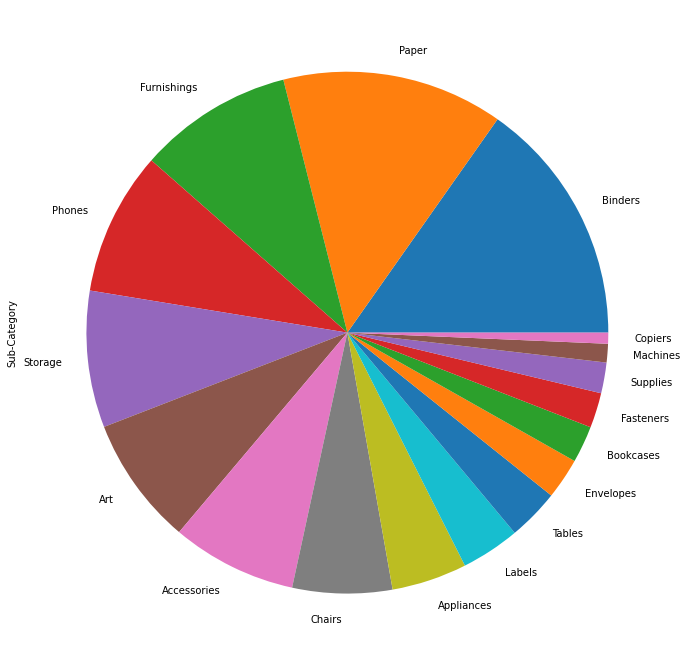

In [25]:
plt.figure(figsize=(15,12))
data['Sub-Category'].value_counts().plot.pie()
plt.show()